In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot space as inline for inline plots display
%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
#pd.set_option('display.float_format', lambda x: '%.0f' % x) 
pd.options.display.float_format = '{:,.0f}'.format

## Budget Ranges vs. profit

In [71]:
counts_pos = []

In [53]:
counts_neg = []

In [2]:
df = pd.read_csv('data/boxoffice_profit.csv')

In [3]:
df.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,2351345279,True
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,635063875,True
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-200237650,False
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,1072413963,True
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,999721747,True


### Profitable less than 10,000,000

In [73]:
counts_pos.append(len(df[(df['profit'] == True) &  (df['production_budget'] < 10000000)].index))

In [75]:
counts_pos.append(len(df[(df['profit'] == True) &  (df['production_budget'] >= 10000000) & (df['production_budget'] <= 20000000)].index))

In [77]:
counts_pos.append(len(df[(df['profit'] == True) &  (df['production_budget'] >= 20000000) & (df['production_budget'] <= 50000000)].index))

In [78]:
counts_pos.append(len(df[(df['profit'] == True) &  (df['production_budget'] >= 50000000) & (df['production_budget'] <= 100000000)].index))

In [79]:
counts_pos.append(len(df[(df['profit'] == True) &  (df['production_budget'] >= 100000000) & (df['production_budget'] <= 200000000)].index))

In [80]:
counts_pos.append(len(df[(df['profit'] == True) &  (df['production_budget'] >= 20000000)].index))

In [81]:
counts_pos

[1059, 777, 1086, 626, 330, 1968]

### Not Profitable less than 10,000,000

In [84]:
counts_neg.append(len(df[(df['profit'] == False) &  (df['production_budget'] < 10000000)].index))

In [85]:
counts_neg.append(len(df[(df['profit'] == False) &  (df['production_budget'] >= 10000000) & (df['production_budget'] <= 20000000)].index))

In [86]:
counts_neg.append(len(df[(df['profit'] == False) &  (df['production_budget'] >= 20000000) & (df['production_budget'] <= 50000000)].index))

In [87]:
counts_neg.append(len(df[(df['profit'] == False) &  (df['production_budget'] >= 50000000) & (df['production_budget'] <= 100000000)].index))

In [88]:
counts_neg.append(len(df[(df['profit'] == False) &  (df['production_budget'] >= 100000000) & (df['production_budget'] <= 200000000)].index))

In [89]:
counts_neg.append(len(df[(df['profit'] == False) &  (df['production_budget'] >= 20000000)].index))

In [96]:
counts_neg = np.asarray(counts_neg)

In [100]:
counts_neg = counts_neg * (-1)

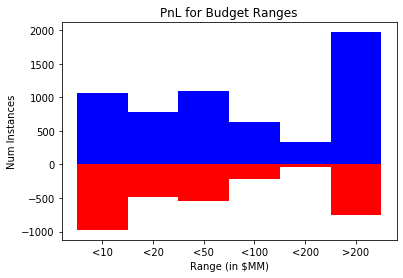

In [103]:
x = range(6)
labels = ['<10','<20','<50','<100','<200','>200']
fig = plt.figure()
ax = plt.subplot(111)
plt.title('PnL for Budget Ranges')
plt.xlabel('Range (in $MM)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.ylabel('Num Instances')
ax.bar(x, counts_neg, width=1, color='r')
ax.bar(x, counts_pos, width=1, color='b')
plt.show()

In [ ]:
top10 = df.studio.value_counts().head(10)

In [ ]:
top10

In [ ]:
type(top10)

### loop through and sum the totals for each studio

In [ ]:
df.groupby(['studio']).sum()

In [ ]:
df_agg = df.groupby(['studio']).agg('sum')

In [ ]:
df_agg = df_agg.sort_values('total_gross', ascending=False).head(10)

In [ ]:
df_agg['foreign_gross']


In [ ]:
# an example of a bar plot 
ax = plt.subplot() # create an axis object, which the plot object which we can customize
studios = df_agg.index
dom_gross = df_agg.domestic_gross
for_gross = df_agg.foreign_gross
tot_gross = df_agg.total_gross

plt.bar(range(len(studios)), dom_gross, color='pink')
plt.bar(range(len(studios)), for_gross, color='purple', bottom=dom_gross)
plt.title('Total Gross')
plt.xlabel('Top 10 Studios')
plt.ylabel('Revenue (Trillions)')
ax.set_xticks(range(len(studios)))
ax.set_xticklabels(studios)
#ax.set_yticks(range(len(tot_gross)))
#ax.set_yticklabels(studios)
plt.legend(['Domestic', 'Foreign'])   #must be an array, not a string
plt.show()     # add a ; to remove the crazy at the top or the grapy.
# one dimensional for bar